In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn import set_config
import seaborn as sns
set_config(display='diagram')

Load the data

In [4]:
df_train = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
df_test = pd.read_csv('/content/drive/My Drive/titanic_test.csv')
print(df_train.head(5))
print('*'*150)
print(df_test.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [7]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.25,random_state=42)

In [8]:
cat_cols = x_train.select_dtypes('object').columns.to_list()
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
num_cols = x_train.select_dtypes(exclude='object').columns.to_list()
num_cols

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Pipeline for preprocessing

In [25]:
categorical_preprocessing = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant')),('encoder',OneHotEncoder(handle_unknown = 'ignore'))])

In [26]:
numerical_preprocessing = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaling',StandardScaler())])

In [27]:
preprocessor = ColumnTransformer([('categorcal',categorical_preprocessing,cat_cols),('numeric',numerical_preprocessing,num_cols)])

Now we add the preprocessor and the model in our pipeline

In [28]:
pipe = Pipeline(steps=[('preprocessor',preprocessor),('model',LogisticRegression(C=1e9))])

In [29]:
print(x_train.iloc[0])

PassengerId                      299
Pclass                             1
Name           Saalfeld, Mr. Adolphe
Sex                             male
Age                              NaN
SibSp                              0
Parch                              0
Ticket                         19988
Fare                            30.5
Cabin                           C106
Embarked                           S
Name: 298, dtype: object


In [30]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorcal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Sex', 'Ticket',
                                                   'Cabin', 'Embarked']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('model', LogisticRegression(C=1000000000.0))])

In [31]:
pred = pipe.predict(x_val)
pred_train = pipe.predict(x_train)
print('train accuracy : ',accuracy_score(pred_train,y_train))
print('validation accuracy : ',accuracy_score(pred,y_val))

train accuracy :  1.0
validation accuracy :  0.8295964125560538


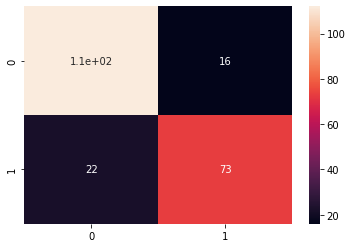

In [34]:
sns.heatmap(confusion_matrix(pred,y_val),annot=True)

In [36]:
pred = pipe.predict(df_test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId,'Survived':pred})

In [37]:
print(output.head(5))

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
